# Sieci Neuronowe - lista 1
## Jakub Czajkowski 272709
---
### Odpowiedzi na pytania:
1. Czy zbiór jest zbalansowany pod względem liczby próbek na klasy?

    Na pierwszy rzut oka klasy nie są zbalansowane - dominuje klasa 0. Jednak w opisie data-setu znajduje się następująca informacja:
    
    `Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).`
    
    Porównując liczność wartości 0 oraz sumę liczności wartości 1-4 otrzymujemy wynik 164-139, więc zbiór można uznać za zbalansowany.

    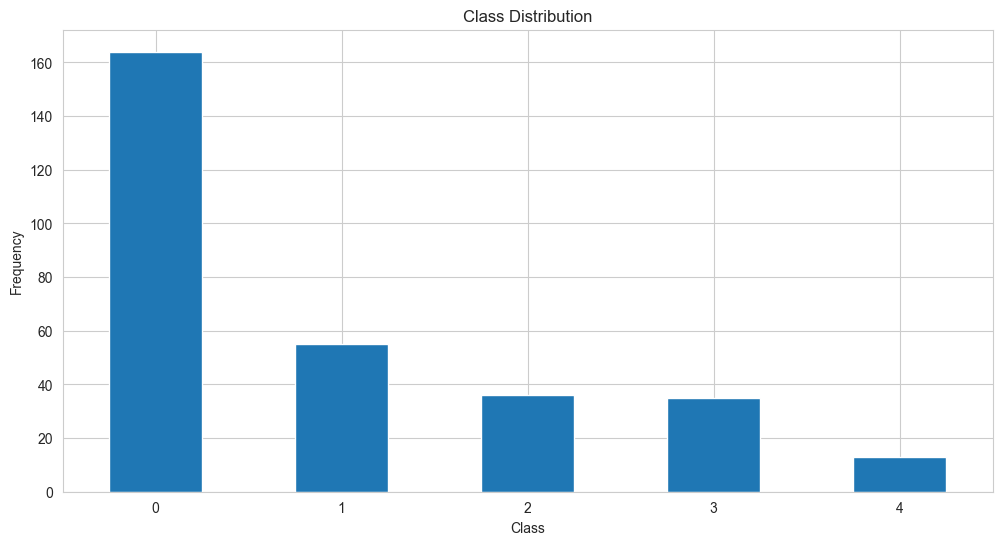

2. Jakie są średnie i odchylenia cech liczbowych?

| Feature  | count     | mean      | std       | min   | max    |
|----------|-----------|-----------|-----------|-------|--------|
| age      | 303.000000| 54.438944 | 9.038662  | 29.000| 77.000 |
| trestbps | 303.000000|131.689769 |17.599748  | 94.000|200.000 |
| chol     | 303.000000|246.693069 |51.776918  |126.000|564.000 |
| thalach  | 303.000000|149.607261 |22.875003  | 71.000|202.000 |
| oldpeak  | 303.000000| 1.039604  | 1.161075  | 0.000 | 6.200  |
| ca       | 299.000000| 0.672241  | 0.937438  | 0.000 | 3.000  |

3. Dla cech liczbowych: czy ich rozkład jest w przybliżeniu normalny?

    Rozkłady cech liczbowych (przedstawione poniżej) przypominają rozkład normalny, jednak po wykonaniu testu statystycznego Shapiro-Wilka z poziomem istotności 0.05 stwierdzono, że rozkład cech nie jest normalny dla żadnej z cech liczbowych.

4. Dla cech kategorycznych: czy rozkład jest w przybliżeniu równomierny?

    Cechy kategoryczne nie mają rozkładu równomiernego (wykresy poniżej). 
    - sex — przeważają mężczyźni; 
    - fbs — większość wartości to 0; 
    - exang — większość wartości to 0; 
    - cp, restecg, slope, thal — kategorie mają różne liczności (nierównomierne rozkłady), przy czym thal zawiera brakujące wartości.  

5. Czy występują cechy brakujące i jaką strategię możemy zastosować żeby je zastąpić?

Brakujące wartości: ca (4 brakujące), thal (2 brakujące).

Proponowane strategie:
- Usunięcie wierszy z brakami
- Uzupełnienie wierszy najczęściej występującą wartością (moda).

### Kod źródłowy 

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
# print(heart_disease.metadata)
  
# variable information 
# print(heart_disease.variables)

In [2]:
# visualization settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)


In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB
None
num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64
num
0      0.541254
1      0.181518
2      0.118812
3      0.115512
4      0.042904
Name: proportion, dtype: float64


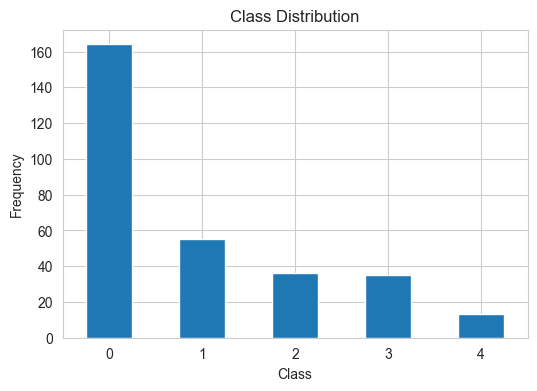

In [4]:
# Check if the data is balanced
print(y.info())
print(y.value_counts())
print(y.value_counts(normalize=True))

y['num'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [5]:
# Numeric feature analysis
variables = heart_disease.variables
categorical_features = variables[variables["type"] == "Categorical"]["name"].tolist()
numeric_features = variables[variables["type"] == "Integer"]["name"].tolist()

if 'num' in numeric_features:
    numeric_features.remove('num')  # Remove target variable if present

print (X[numeric_features].describe())

              age    trestbps        chol     thalach     oldpeak          ca
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000
mean    54.438944  131.689769  246.693069  149.607261    1.039604    0.672241
std      9.038662   17.599748   51.776918   22.875003    1.161075    0.937438
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000
25%     48.000000  120.000000  211.000000  133.500000    0.000000    0.000000
50%     56.000000  130.000000  241.000000  153.000000    0.800000    0.000000
75%     61.000000  140.000000  275.000000  166.000000    1.600000    1.000000
max     77.000000  200.000000  564.000000  202.000000    6.200000    3.000000


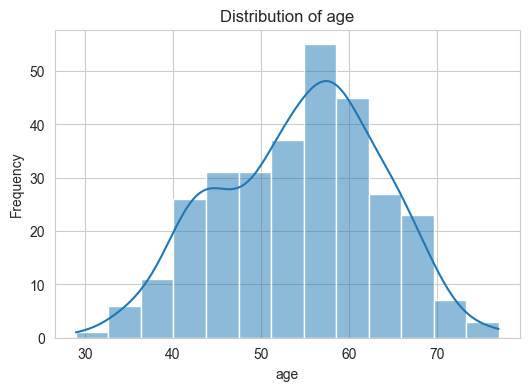

Shapiro-Wilk test for age: Statistics=0.9864633486244719, p-value=0.00606864296787786
age does not look Gaussian (reject H0)


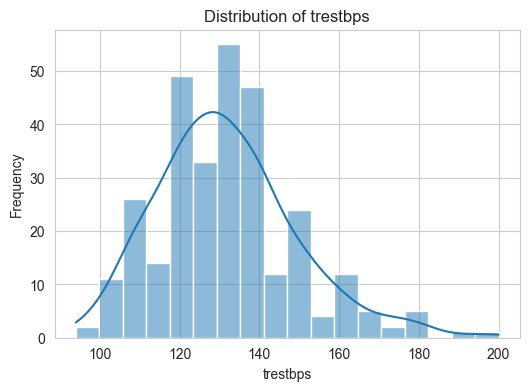

Shapiro-Wilk test for trestbps: Statistics=0.9665453596380931, p-value=1.802064378380578e-06
trestbps does not look Gaussian (reject H0)


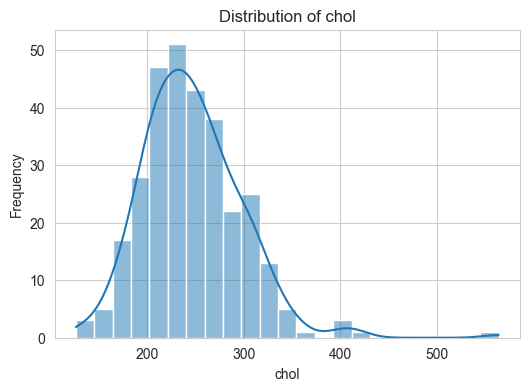

Shapiro-Wilk test for chol: Statistics=0.9472537169600329, p-value=5.911519614826153e-09
chol does not look Gaussian (reject H0)


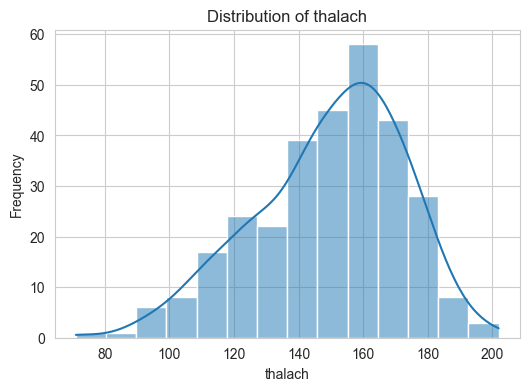

Shapiro-Wilk test for thalach: Statistics=0.9764523936523639, p-value=6.996471280588312e-05
thalach does not look Gaussian (reject H0)


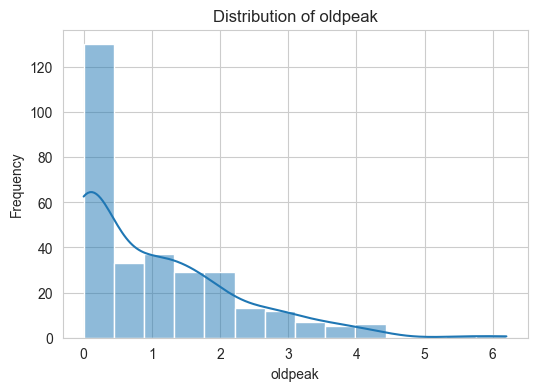

Shapiro-Wilk test for oldpeak: Statistics=0.8441833633071752, p-value=8.18337837232528e-17
oldpeak does not look Gaussian (reject H0)


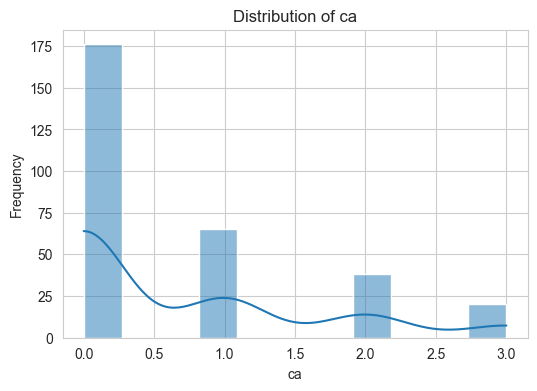

Shapiro-Wilk test for ca: Statistics=0.7187022190711367, p-value=4.0127738143281705e-22
ca does not look Gaussian (reject H0)


In [6]:
# Combined plotting and Shapiro-Wilk test for numeric features
for feature in numeric_features:
    if feature not in X.columns:
        continue
    data = X[feature].dropna()

    plt.figure()
    sns.histplot(data, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    stat, p = stats.shapiro(data)
    print(f'Shapiro-Wilk test for {feature}: Statistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'{feature} looks Gaussian (fail to reject H0)')
    else:
        print(f'{feature} does not look Gaussian (reject H0)')

In [7]:
for feature in categorical_features:
    if feature in X.columns:
        print(f"\n{feature}:")
        print(X[feature].value_counts().sort_index())


sex:
sex
0     97
1    206
Name: count, dtype: int64

cp:
cp
1     23
2     50
3     86
4    144
Name: count, dtype: int64

fbs:
fbs
0    258
1     45
Name: count, dtype: int64

restecg:
restecg
0    151
1      4
2    148
Name: count, dtype: int64

exang:
exang
0    204
1     99
Name: count, dtype: int64

slope:
slope
1    142
2    140
3     21
Name: count, dtype: int64

thal:
thal
3.0    166
6.0     18
7.0    117
Name: count, dtype: int64


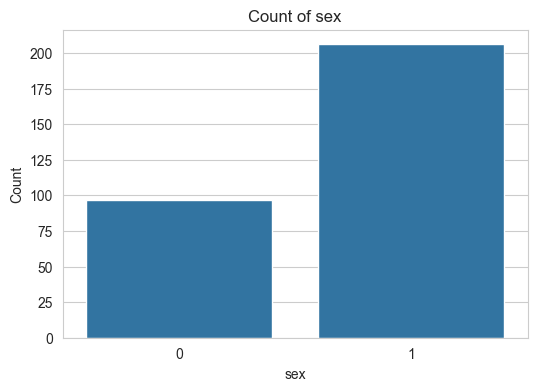

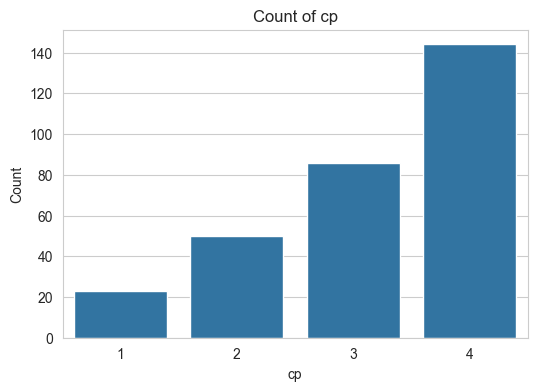

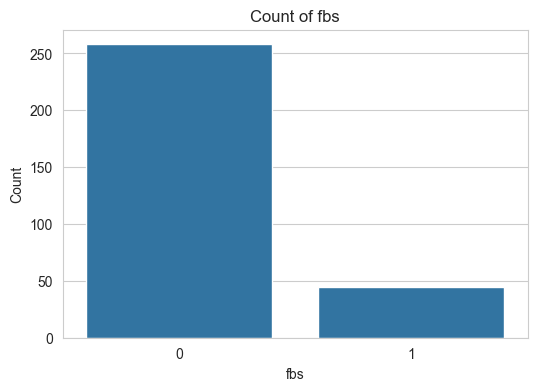

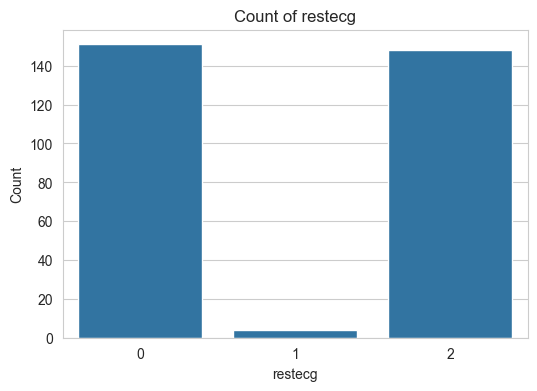

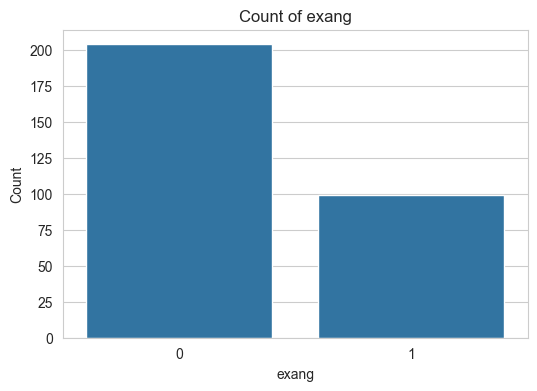

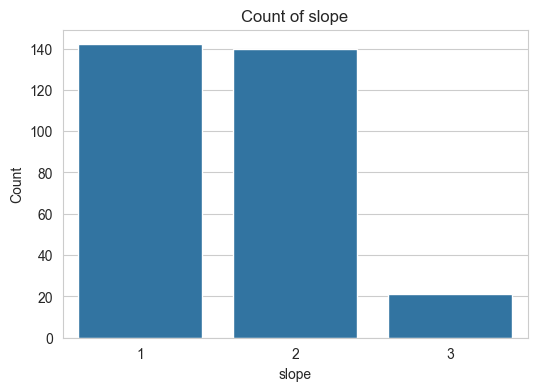

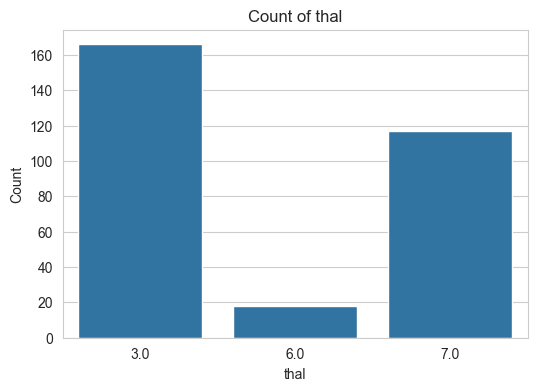

In [8]:
# categorical plots
for feature in categorical_features:
    if feature in X.columns:
        plt.figure()
        sns.countplot(x=X[feature])
        plt.title(f'Count of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

In [9]:
### Przygotowanie macierzy cech numerycznych
cat_cols = [col for col in categorical_features if col in X.columns]
X_prepared = X.copy()

for col in X_prepared.columns:
    mode_series = X_prepared[col].mode(dropna=True)
    if not mode_series.empty:
        X_prepared[col] = X_prepared[col].fillna(mode_series.iloc[0])

for col in cat_cols:
    X_prepared[col] = X_prepared[col].astype("category")

X_encoded = pd.get_dummies(
    X_prepared,
    columns=cat_cols,
    drop_first=False,
    dummy_na=False
)

feature_names = X_encoded.columns.tolist()
X_matrix = X_encoded.to_numpy(dtype=np.float64)

In [10]:
# export to pickle
import pickle
with open('data.pkl', 'wb') as f:
    pickle.dump((X_matrix, y), f)
